In [1]:
import pandas as pd

In [3]:
csv_file_path = '/Users/aleksey/Main/MachineLearning/moving-classification/gyroscope_data.csv'

data = pd.read_csv(csv_file_path) 

In [4]:
data.columns

Index(['x_axis', 'y_axis', 'z_axis', 'ax_axis', 'ay_axis', 'az_axis',
       'activity_type'],
      dtype='object')

In [5]:
data.head()

,x_axis,y_axis,z_axis,ax_axis,ay_axis,az_axis,activity_type
0,0,0,0,0,0,0,situps
1,-212,-48,174,-6,-2,1,situps
2,-4,1,1,-5,-1,1,situps
3,-3,1,1,-4,-1,1,situps
4,-1,1,1,-3,-1,1,situps


In [6]:
data.describe()

,x_axis,y_axis,z_axis,ax_axis,ay_axis,az_axis
count,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000,63000.000000
mean,0.091889,-0.205825,0.115381,0.002254,0.008952,0.006000
std,64.461165,51.651664,67.135892,2.244007,1.741628,2.150756
min,-1261.000000,-492.000000,-510.000000,-48.000000,-61.000000,-51.000000
25%,-31.000000,-18.000000,-41.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,20.000000,40.000000,1.000000,1.000000,1.000000
max,1007.000000,536.000000,436.000000,19.000000,22.000000,59.000000


In [7]:
data.iloc[3]

x_axis               -3
y_axis                1
z_axis                1
ax_axis              -4
ay_axis              -1
az_axis               1
activity_type    situps
Name: 3, dtype: object

In [8]:
data[0:4]

,x_axis,y_axis,z_axis,ax_axis,ay_axis,az_axis,activity_type
0,0,0,0,0,0,0,situps
1,-212,-48,174,-6,-2,1,situps
2,-4,1,1,-5,-1,1,situps
3,-3,1,1,-4,-1,1,situps


In [16]:
data.groupby('activity_type').describe()

ax_axis                                                 \
                 count      mean       std   min  25%  50%  75%   max   
activity_type                                                           
abs            14000.0  0.006286  2.595245 -29.0 -1.0  0.0  2.0  18.0   
pushups        24800.0  0.006613  2.678981 -48.0 -1.0  0.0  1.0  19.0   
situps         24200.0 -0.004545  1.363142 -14.0  0.0  0.0  0.0  10.0   

               ay_axis            ...   y_axis          z_axis            \
                 count      mean  ...      75%    max    count      mean   
activity_type                     ...                                      
abs            14000.0  0.026571  ...     17.0  135.0  14000.0  2.401214   
pushups        24800.0  0.002379  ...     19.0  536.0  24800.0  0.693952   
situps         24200.0  0.005496  ...     24.0  246.0  24200.0 -1.799917   

                                                         
                     std    min   25%  50%   75%    max  
activity_type                                            
abs            77.142999 -247.0 -58.0  6.0  63.0  296.0  
pushups        80.870669 -510.0 -59.0  0.0  56.0  436.0  
situps         39.775453 -185.0 -23.0 -2.0  16.0  315.0  

[3 rows x 48 columns]

index: 136


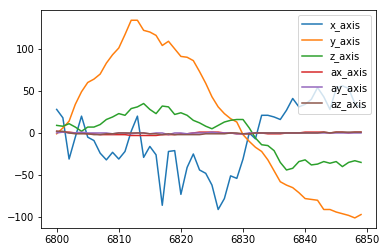

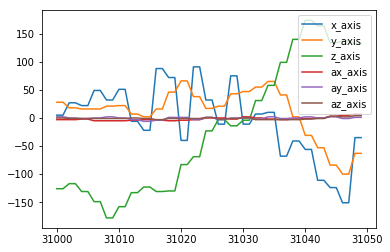

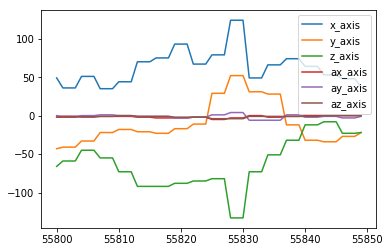

In [33]:
%matplotlib inline
import random

randomIndexToPrint = int(random.random() * (data[data['activity_type'] == 'abs'].shape[0] // 50))

print('index:', randomIndexToPrint)

data[data['activity_type'] == 'situps'][randomIndexToPrint * 50 : (randomIndexToPrint + 1) * 50].plot()
data[data['activity_type'] == 'pushups'][randomIndexToPrint * 50 : (randomIndexToPrint + 1) * 50].plot()
data[data['activity_type'] == 'abs'][randomIndexToPrint * 50 : (randomIndexToPrint + 1) * 50].plot()